# Lecture 7: Class demo

## Imports

In [1]:
import os
import sys

sys.path.append(os.path.join(os.path.abspath(".."), (".."), "code"))

import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
from plotting_functions import *

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)

%matplotlib inline
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from utils import *

pd.set_option("display.max_colwidth", 200)
DATA_DIR = os.path.join(os.path.abspath(".."), (".."), "data/")

## Spam classification example 

### SVC classifier for spam detection 

- Before discussing how it works, let's try it out with sklearn. 
- Let's first try SVC classifier on [the SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset). (This is what you did in the lab last week.)

In [2]:
sms_df = pd.read_csv(DATA_DIR + "spam.csv", encoding="latin-1")
sms_df = sms_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms_df = sms_df.rename(columns={"v1": "target", "v2": "sms"})

In [3]:
train_df, test_df = train_test_split(sms_df, test_size=0.2, random_state=123)
X_train, y_train = train_df["sms"], train_df["target"]
X_test, y_test = test_df["sms"], test_df["target"]
train_df.head()

target  \
385     ham   
4003    ham   
1283    ham   
2327   spam   
1103    ham   

                                                                                                                                                                                                          sms  
385                                                                                                                                                                                    It took Mr owl 3 licks  
4003  Well there's a pattern emerging of my friends telling me to drive up and come smoke with them and then telling me that I'm a weed fiend/make them smoke too much/impede their doing other things so ...  
1283                                                                                                                                                                                Yes i thought so. Thanks.  
2327                                  URGENT! Your mobile number *************** WON a å£2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm  
1103                                                                                                                                     Aiyah sorry lor... I watch tv watch until i forgot 2 check my phone.

In [4]:
results_dict = {}
pipe_svc = make_pipeline(CountVectorizer(binary=True), SVC())
results_dict["SVC"] = mean_std_cross_val_scores(
    pipe_svc, X_train, y_train, return_train_score=True
)

In [5]:
pd.DataFrame(results_dict)

SVC
fit_time     0.409 (+/- 0.016)
score_time   0.099 (+/- 0.001)
test_score   0.979 (+/- 0.004)
train_score  0.996 (+/- 0.001)

### `sklearn` naive Bayes classifier 

- Let's try Naive Bayes on this problem. 

In [6]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

pipe_nb = make_pipeline(CountVectorizer(binary=True), BernoulliNB())
results_dict["Naive Bayes"] = mean_std_cross_val_scores(
    pipe_nb, X_train, y_train, return_train_score=True
)

In [7]:
pd.DataFrame(results_dict)

SVC        Naive Bayes
fit_time     0.409 (+/- 0.016)  0.034 (+/- 0.013)
score_time   0.099 (+/- 0.001)  0.006 (+/- 0.001)
test_score   0.979 (+/- 0.004)  0.974 (+/- 0.004)
train_score  0.996 (+/- 0.001)  0.987 (+/- 0.001)

- The validation scores are very similar. 
- Much faster than the SVC classifier!! 

Now let's try to understand how `predict` and `fit` work for this model. Let's bring back the toy dataset from before and encode it with BOW representation.  

In [8]:
X_toy = [
    "URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!",
    "Lol you are always so convincing. I'm going to give you a free advice. It's urgent.",
    "Block 2 has interesting courses.",
    "URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!",
    "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!",
    "Block 2 has been great so far.",
]
y_toy = ["spam", "ham", "ham", "spam", "spam", "ham"]
toy_df = pd.DataFrame({"sms":X_toy, "target":y_toy})

- For simplicity, let's use `CountVectorizer` with `binary=True`, i.e., assume presence or absence of words instead of counts and only consider the top 4 features.    

In [9]:
vec = CountVectorizer(max_features=4, stop_words="english", binary=True)
X_toy_vec = vec.fit_transform(X_toy, y_toy)

In [10]:
toy_bow_df = pd.DataFrame(
    X_toy_vec.toarray(), columns=vec.get_feature_names_out(), index=X_toy
)
toy_bow_df["target"] = y_toy
toy_bow_df

block  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                      0   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                               0   
Block 2 has interesting courses.                                                                                  1   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                       0   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!      0   
Block 2 has been great so far.                                                                                    1   

                                                                                                              free  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                     0   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                              1   
Block 2 has interesting courses.                                                                                 0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                      1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!     1   
Block 2 has been great so far.                                                                                   0   

                                                                                                              prize  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                      1   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                               0   
Block 2 has interesting courses.                                                                                  0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                       1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!      0   
Block 2 has been great so far.                                                                                    0   

                                                                                                              urgent  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                       1   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                                1   
Block 2 has interesting courses.                                                                                   0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                        1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!       0   
Block 2 has been great so far.                                                                                     0   

                                                                                                             target  
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                   spam  
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                             ham  
Block 2 has interesting courses.                                                                                ham  
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                    spam  
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!   spam  
Block 2 has been great so far.                                    

Let's train a Bernoulli Naive Bayes model on this toy data. 

In [11]:
model = BernoulliNB()
model.fit(X_toy_vec, y_toy)

BernoulliNB()

### Naive Bayes `predict`

- Given new messages, we want to predict whether they are spam or ham.
- Example: Predict whether the following message is spam or ham. 
> "URGENT! Free!!"

Remember the two simplifying assumptions of naive Bayes? 

**BOW representaion**: First, let's get BOW representation of the message.  

In [12]:
deploy_test = ["URGENT! Free!!", "Let's enjoy the last week of block 2!"]
deploy_bow = vec.transform(deploy_test).toarray()
bow_df = pd.DataFrame(
    deploy_bow, columns=vec.get_feature_names_out(), index=deploy_test
)
bow_df

block  free  prize  urgent
URGENT! Free!!                             0     1      0       1
Let's enjoy the last week of block 2!      1     0      0       0

Let's predict with the Bernoulli Naive Bayes model. 

In [13]:
model.predict(deploy_bow)

array(['spam', 'ham'], dtype='<U4')

In [ ]:
model.predict_proba(deploy_bow)

<br><br><br><br>

What's happening under the hood? To predict the correct class, assuming **conditional independence**, naive Bayes estimates some scores which are proportional to the following probabilities and picks the target with higher score.

- $P(\text{spam} \mid \text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1}) \propto  P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1} \mid \text{spam}) \times P(spam)$ 
- $P(\text{ham} \mid  \text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1}) \propto  P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1} \mid \text{spam}) \times P(ham)$

For each target, we need to calculate two probabilities: 
- **Prior probabilities**: $P(\text{target})$
- **Conditional probabilities**: $P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent=1} \mid \text{target})$

#### Computing prior probabilities 
- Prior probability: what's the proportion of the target class occurs in our training dataset?
    - $P(\text{spam}) = 3/6$    
    - $P(\text{ham}) = 3/6$

In [14]:
toy_bow_df['target'].value_counts()

target
spam    3
ham     3
Name: count, dtype: int64

#### Computing conditional probabilities 

- Assumption: **Features are independent, conditioned on the target**. 
    - Example: In our spam classification example, **once you know that a message is spam**, the probability that the word "urgent" appears is independent of whether "free" also appeared. 
    - So if you know that a message is spam, knowing whether the word "urgent" occurs gives no additional information about whether "free" also appears. 
    
- We can write this mathematically as 

$$\begin{equation}
\begin{split}
& P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{spam}) \\
&\approx P(\text{block} = 0 \mid \text{spam}) \times P(\text{free} = 1 \mid \text{spam}) \times P(\text{prize} = 0 \mid \text{spam}) \times P(\text{urgent} = 1 \mid \text{spam})\\\\
& P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{ham}) \\
&\approx P(\text{block} = 0 \mid \text{ham}) \times P(\text{free} = 1 \mid \text{ham}) \times P(\text{prize} = 0 \mid \text{ham}) \times P(\text{urgent} = 1 \mid \text{ham})
\end{split}
\end{equation}$$


We can calculate these based on the frequencies of these words in our training data. 

In [15]:
spam_toy_df = toy_df[toy_df['target'] == 'spam']
ham_toy_df = toy_df[toy_df['target'] == 'ham']

/Users/kvarada/MDS/2024-25/571/DSCI_571_sup-learn-1_students/lectures/002-regressors-Varada-lectures/../code/plotting_functions.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels=spam_words, rotation=45)
/Users/kvarada/MDS/2024-25/571/DSCI_571_sup-learn-1_students/lectures/002-regressors-Varada-lectures/../code/plotting_functions.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels=ham_words, rotation=45)


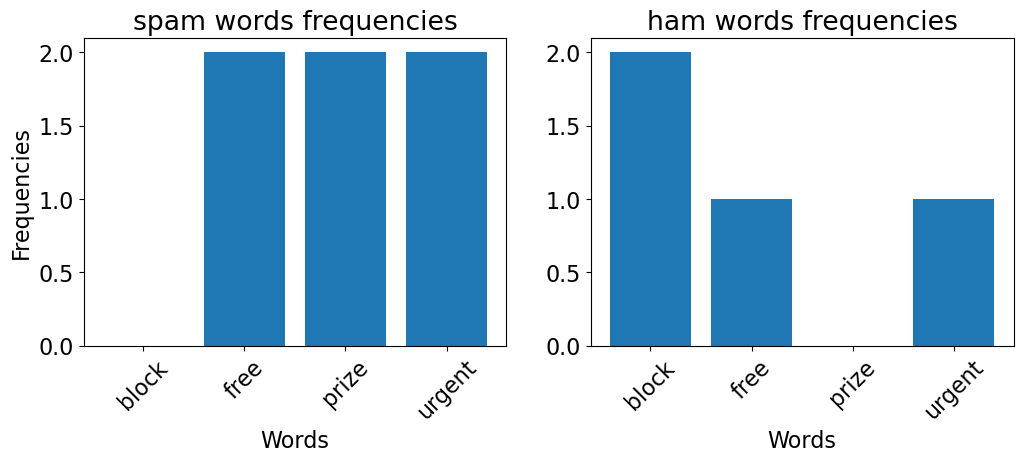

In [16]:
plot_spam_ham_word_freq(spam_toy_df['sms'], ham_toy_df['sms']) # custom function defined in code/plotting_functions.oy

So in this toy example, for each target, we need the following conditional probabilities for prediction.
1. $P(\text{block} = 0 \mid \text{target})$
2. $P(\text{free} = 1 \mid \text{target})$
3. $P(\text{prize} = 0 \mid \text{target})$
4. $P(\text{urgent} = 1 \mid \text{target})$
use our training data to estimate these probabilities. 

In [17]:
toy_bow_df

block  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                      0   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                               0   
Block 2 has interesting courses.                                                                                  1   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                       0   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!      0   
Block 2 has been great so far.                                                                                    1   

                                                                                                              free  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                     0   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                              1   
Block 2 has interesting courses.                                                                                 0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                      1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!     1   
Block 2 has been great so far.                                                                                   0   

                                                                                                              prize  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                      1   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                               0   
Block 2 has interesting courses.                                                                                  0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                       1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!      0   
Block 2 has been great so far.                                                                                    0   

                                                                                                              urgent  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                       1   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                                1   
Block 2 has interesting courses.                                                                                   0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                        1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!       0   
Block 2 has been great so far.                                                                                     0   

                                                                                                             target  
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                   spam  
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                             ham  
Block 2 has interesting courses.                                                                                ham  
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                    spam  
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!   spam  
Block 2 has been great so far.                                    

#### Conditional probabilities for the target spam
- What is $P(\text{block} = 0 \mid \text{spam})$? 
    - Given target is spam, how often "block" = 0? $3/3$
- $P(\text{free} = 1 \mid \text{spam}) = 2/3$ 
- $P(\text{prize} = 0 \mid \text{spam}) = 1/3$
- $P(\text{urgent} = 1 \mid \text{spam}) = 2/3$


So using naive Bayes, $P(\text{spam} \mid \text{message})$ is proportional to 

$$\begin{equation}
\begin{split}
P(\text{spam} \mid \text{message}) &\propto P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{spam}) \times P(\text{spam})\\
&\propto P(\text{block} = 0 \mid \text{spam}) \times P(\text{free} = 1 \mid \text{spam}) \\
& \times P(\text{prize} = 0 \mid \text{spam}) \times P(\text{urgent} = 1 \mid \text{spam}) \times P(\text{spam})\\
&\propto 3/3 \times 2/3 \times 1/3 \times 2/3 \times 3/6\\
\end{split}
\end{equation}$$


In [18]:
spam_prior = 3 / 6
block0_spam = 3 / 3
free1_spam = 2 / 3
prize0_spam = 1 / 3
urgent1_spam = 2 / 3
spam_estimate = spam_prior * block0_spam * free1_spam * prize0_spam * urgent1_spam
spam_estimate

0.07407407407407407

#### Conditional probabilities for the target ham 

- What is $P(\text{block} = 0 \mid \text{ham})$? 
    - Given target is ham, how often "block" = 0? $1/3$
- $P(\text{free} = 1 \mid \text{ham}) = 1/3$ 
- $P(\text{prize} = 0 \mid \text{ham}) = 3/3$
- $P(\text{urgent} = 1 \mid \text{ham}) = 1/3$

So using naive Bayes, $P(\text{ham} \mid \text{message})$ is proportional to 
$$\begin{equation}
\begin{split}
P(\text{ham} \mid \text{message}) &\propto P(\text{block} = 0, \text{free} = 1, \text{prize} = 0, \text{urgent} = 1 \mid \text{ham}) \times P(\text{ham})\\
&\propto P(\text{block} = 0 \mid \text{ham}) \times P(\text{free} = 1 \mid \text{ham}) \\
& \times P(\text{prize} = 0 \mid \text{ham}) \times P(\text{urgent} = 1 \mid \text{ham}) \times P(\text{ham})\\
&\propto 1/3 \times 1/3 \times 3/3 \times 1/3 \times 3/6\\
\end{split}
\end{equation}$$


In [19]:
ham_prior = 3 / 6
block0_ham = 1 / 3
free1_ham = 1 / 3
prize0_ham = 3 / 3
urgent1_ham = 1 / 3
ham_estimate = (
    ham_prior
    * block0_ham
    * free1_ham
    * prize0_ham
    * urgent1_ham
)
ham_estimate

0.018518518518518517

In [20]:
print('spam estimate: ', spam_estimate)
print('ham estimate: ', ham_estimate)

spam estimate:  0.07407407407407407
ham estimate:  0.018518518518518517


Since $P(spam \mid message)$ is proportional to a bigger number, we pick "spam" as the label.

- Note that these estimates are not well-defined probabilities, as we ignored the denominator when calculating these estimates. 
- Let's normalize these estimates so that they sum to 1.0 

In [21]:
normalizer = spam_estimate + ham_estimate
spam_prob_score = spam_estimate / normalizer
ham_prob_score = ham_estimate / normalizer
[ham_prob_score, spam_prob_score]

[0.2, 0.8]

Let's examine whether we get the same numbers with `sklearn`'s `BernoulliNB`. 
- We are using `BernoulliNB` because our features are binary. 

<br><br>

### Summary of naive Bayes `predict`
- Use Bayes rule to calculate the conditional probability of each target given the message. 

$$ P(\text{target} \mid \text{message}) = \frac{P(\text{message} \mid \text{target}) \times P(\text{target})}{P(\text{message})} $$

- $P(\text{message})$: marginal probability that a message has the given set of words 
    - Hard to calculate but can be ignored in our scenario.


$$ P(\text{target} \mid \text{message}) \propto P(\text{message} \mid\text{target}) \times P(\text{target}) =  P(w_1, w_2, \dots, w_d \mid \text{target}) \times P(\text{target})$$

- We need the following terms:  
    - $P(\text{target})$: marginal probability that a message has the class target
    - $P(\text{message}\mid\text{target})$: conditional probability that message has words $w_1, w_2, \dots, w_d$, given that it is of the given target.
        - Hard to calculate but we need it. We would require huge numbers of parameters and impossibly large training sets. 
        - Naive assumption that features are independent of each other conditioned on the target. 

        $$P(\text{message} \mid \text{target}) = P(w_1, w_2, . . . , w_d \mid \text{target}) \approx \prod_{i=1}^{d}P(w_i \mid \text{target})$$


### Summary naive Bayes `predict`

Using naive Bayes assumption, estimate scores that are proportional to the following probabilities. 

$$ P(\text{target} \mid \text{message}) \propto P(\text{target}) \times  \prod_{i=1}^{d}P(w_i \mid \text{target})$$

- Predict the target where $P(\text{target} \mid \text{message})$ is proportional to a bigger value. 

## Break (5 min)

![](../../img/eva-coffee.png)


### Naive Bayes classifier `fit`

- Counting and estimating probabilities. 
- Estimate prior probabilities and conditional probabilities for each feature given each class. 

### Prior probabilities

- P(target) $\rightarrow$ how often target $c$ occurs in our dataset in comparison with all other targets.

$$P(c) = \frac{N_c}{N}$$

where, 
- $N_c$ is the number of examples with target $c$ 
- $N$ is total number of examples

### Conditional probabilities 

- Above, we only calculated conditional probabilities which were required for estimating probability score for class given given message. 
- Naive Bayes calculates all conditional probabilities for each feature given each class in advance during `fit`. 
- Then during `predict` it just multiplies the appropriate probabilities. 

In case of Bernoulli naive Bayes with binary classification, for each feature $w$ and target $c$, it calculates four probabilities: 
- $P(w = 1 \mid c = 0) \rightarrow$ Probability that the word is present given target 0.
- $P(w = 0 \mid c = 0) \rightarrow$ Probability that the word is absent given target 0.
- $P(w = 1 \mid c = 1) \rightarrow$ Probability that the word is present given target 1.
- $P(w = 0 \mid c = 1) \rightarrow$ Probability that the word is absent given target 1.

But $P(w = 0 \mid c = 0) = 1 - P(w = 1 \mid c = 0)$
And $P(w = 0 \mid c = 1) = 1 - P(w = 1 \mid c = 1)$

So in reality we just need to calculate two probabilities for each word. 

We calculate these probabilities by counting word and target occurrences in the training data. For example, 
$$ P(w = 1\mid c = 1) = \frac{Count(w = 1, c = 1)}{Count(c = 1)}$$ 

- This is called _maximum likelihood estimation_. 
- It stores these probabilities, which will be later used during predict time.   

<br><br><br><br>

## Laplace smoothing

In [22]:
toy_bow_df

block  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                      0   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                               0   
Block 2 has interesting courses.                                                                                  1   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                       0   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!      0   
Block 2 has been great so far.                                                                                    1   

                                                                                                              free  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                     0   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                              1   
Block 2 has interesting courses.                                                                                 0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                      1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!     1   
Block 2 has been great so far.                                                                                   0   

                                                                                                              prize  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                      1   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                               0   
Block 2 has interesting courses.                                                                                  0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                       1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!      0   
Block 2 has been great so far.                                                                                    0   

                                                                                                              urgent  \
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                       1   
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                                1   
Block 2 has interesting courses.                                                                                   0   
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                        1   
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!       0   
Block 2 has been great so far.                                                                                     0   

                                                                                                             target  
URGENT!! As a valued network customer you have been selected to receive a £900 prize reward!                   spam  
Lol you are always so convincing. I'm going to give you a free advice. It's urgent.                             ham  
Block 2 has interesting courses.                                                                                ham  
URGENT! You have won a 1 week FREE membership in our £100000 prize Jackpot!                                    spam  
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free!   spam  
Block 2 has been great so far.                                    

What will happen if you want to predict for: 

In [23]:
test_ex = ["urgent free block"]

In [24]:
transformed = vec.transform(test_ex)
transformed.toarray()

array([[1, 1, 0, 1]])

In [25]:
spam_prior = 3 / 6
block1_spam = 0 / 3
free1_spam = 2 / 3
prize0_spam = 1 / 3
urgent1_spam = 2 / 3

In [26]:
spam_prior * block1_spam * free1_spam * prize0_spam * urgent1_spam

0.0

- Although all the other words are yelling SPAM! SPAM! SPAM!, since we do not have any example where the word "block" occurs with spam, we get a zero probability. 

![](../../img/eva-qm.png)

- Naive Bayes naively multiplies all the feature likelihoods together, and if any of the terms is zero, it's going to void all other evidence and the probability of the class is going to be zero. 
- Sounds worrisome! 
- We have limited data and if we do not see a feature occurring with a class, it doesn't mean it would never occur with that class. 
- How can we tackle this and avoid obliterating all other probabilities because of one zero in the product?  

### A simplest solution: Laplace smoothing
- The simplest way to avoid zero probabilities is to add one to the counts when we calculate conditional probabilities.
- For example, a smoothed probability of  
    $$ P(\text{block} = 1 \mid \text{spam}) = = \frac{\text{\# documents where block occurs with spam} + 1 }{\text{how often spam occurs} + \text{\# number of possible word values}}$$

$$ P(\text{block} = 1 \mid \text{spam}) = \frac{0 + 1}{3+2}$$


In [29]:
spam_prior = 3 / 6
block1_spam_sm = (0 + 1) / (3 + 2)
free1_spam_sm = (2 + 1) / (3 + 2)
prize0_spam_sm = (1 + 1) / (3 + 2)
urgent1_spam_sm = (2 + 1) / (3 + 2)

In [28]:
spam_prior * block1_spam_sm * free1_spam_sm * prize0_spam_sm * urgent1_spam_sm

0.0144

All the counts that used to be zero will now have a count of 1

We can generalize to adding $\alpha$ instead of 1. So for each feature $w_i$ in the Bernoulli model, smoothing adds $\alpha$ "pseudo-counts" to both cases:
- When $w_i = 1$ (word present).
- When $w_i = 0$ (word absent).

If $\alpha = 1$ (Laplace smoothing), it's like adding 1 pseudo-example where $w_i = 1$ and another 1 pseudo-example where $w_i = 0$, for each word and class.

In summary, smoothing acts as if each individual feature has been observed slightly more times than it actually was—this prevents probabilities from becoming 0

- In `scikit-learn` we control it using hyperparameter `alpha` (by default `alpha=1.0`). 
- Check out sklearn's documentation on [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

Let's try this out on the example above. 

In [30]:
test_ex

['urgent free block']

In [31]:
transformed.toarray()

array([[1, 1, 0, 1]])

In [32]:
# We are now getting more sensible probabilities.   
nb_sm = BernoulliNB(alpha=1.0)
nb_sm.fit(X_toy_vec, y_toy)
nb_sm.predict_proba(transformed)

array([[0.72727273, 0.27272727]])

In [33]:
nb_sm.classes_

array(['ham', 'spam'], dtype='<U4')

### `alpha` hyperparameter and the fundamental tradeoff 

- High alpha $\rightarrow$ underfitting
    - means we are adding large counts to everything and so we are diluting the data
- Low alpha $\rightarrow$ overfitting

In [34]:
results_dict = {
    "alpha": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"bernoullinb__alpha": 10.0 ** np.arange(-7, 3)}

pipe_nb = make_pipeline(CountVectorizer(binary=True), BernoulliNB())
search = GridSearchCV(pipe_nb, param_grid, n_jobs=-1, return_train_score=True)
search.fit(X_train, y_train);

In [35]:
test_scores = search.cv_results_["mean_test_score"]
train_scores = search.cv_results_["mean_train_score"]
alpha_vals = param_grid["bernoullinb__alpha"]

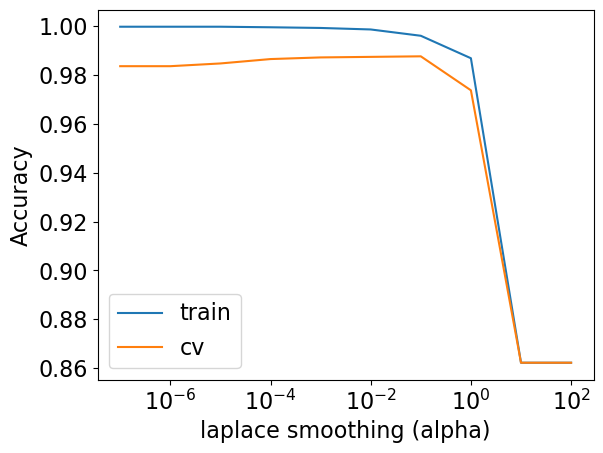

In [36]:
plt.semilogx(alpha_vals, train_scores, label="train")
plt.semilogx(alpha_vals, test_scores, label="cv")
plt.legend()
plt.xlabel("laplace smoothing (alpha)")
plt.ylabel("Accuracy");

### (Optional) Details on the formulas

- In case of `MultinomialNB`, the conditional probabilities will change with the following formula.  

$$ P(w \mid c) = \frac{Count(w, c) + 1 }{Count(c) + \mid vocabulary \mid}$$ 

- In case of Bernoulli naive Bayes, when you calculate conditional probabilities with Laplace smoothing, the formula is slightly different: 

$$ P(w \mid c) = \frac{Count(w, c) + 1 }{Count(c) + 2 }$$ 

- So instead of the $\mid vocabulary \mid$ we just add 2. See the sklearn code [here](https://github.com/scikit-learn/scikit-learn/blob/0d378913b/sklearn/naive_bayes.py#L1031) and [this Stack overflow post](https://stackoverflow.com/questions/40448784/laplace-smoothing-for-bernoulli-model-for-naive-bayes-classifier) for explanation.

Note that when we estimated probabilities in our toy example (e.g., $P(\text{word} \mid spam)$), we happened to have each feature value as either 0 or 1, i.e., just the existence of a word in the document's bag of words. We computed $P(\text{word} \mid spam)$ as a fraction of times the word appears among all words in all messages of the spam class. If we want to work with frequencies instead of existence, we first concatenate all documents with that class (e.g., spam class) into one big "class c" text. Then we use the frequency of the word (e.g., _urgent_ below) in this concatenated document to give a (maximum likelihood) estimate of the probability:

$$P(\text{urgent} \mid \text{spam}) = \frac{Count(\text{urgent}, \text{spam})}{\sum_{w \in vocabulary} Count(w, \text{spam})}$$ 

$$P(\text{urgent} \mid \text{spam}) = \frac{\text{how often urgent occurs with spam}}{\text{total number of tokens (all occurrences of all words) in spam}}$$

<br><br><br><br>

## Naive Bayes with continuous features

- We can use Gaussian Naive Bayes if you have continuous features. ([Watch this](https://www.youtube.com/watch?v=H3EjCKtlVog)).
- Here is the general idea of Gaussian naive Bayes:
    - Assume each feature is normally distributed. 
    - Calculate the mean ($\mu_k$) and standard deviation ($\sigma_k$) for each feature for each class.
    - Use the following equation to calculate the likelihood of observing feature value $v$ in class $C_k$

![](../../img/gaus_nb.png)

<!-- <center>
<img src='./img/gaus_nb.png' width="400">
</center>
 -->
Source: [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes)

Let's work through a toy example. 

In [37]:
import pandas as pd

data = {
    'Weight (in grams)': [100, 105, 103, 101, 160, 162, 163, 164],
    'Sugar Content (in %)': [10, 11, 10.5, 10.2, 18, 19, 19.5, 18.8],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Orange']
}

df = pd.DataFrame(data)

df

Weight (in grams)  Sugar Content (in %)   Fruit
0                100                  10.0   Apple
1                105                  11.0   Apple
2                103                  10.5   Apple
3                101                  10.2   Apple
4                160                  18.0  Orange
5                162                  19.0  Orange
6                163                  19.5  Orange
7                164                  18.8  Orange

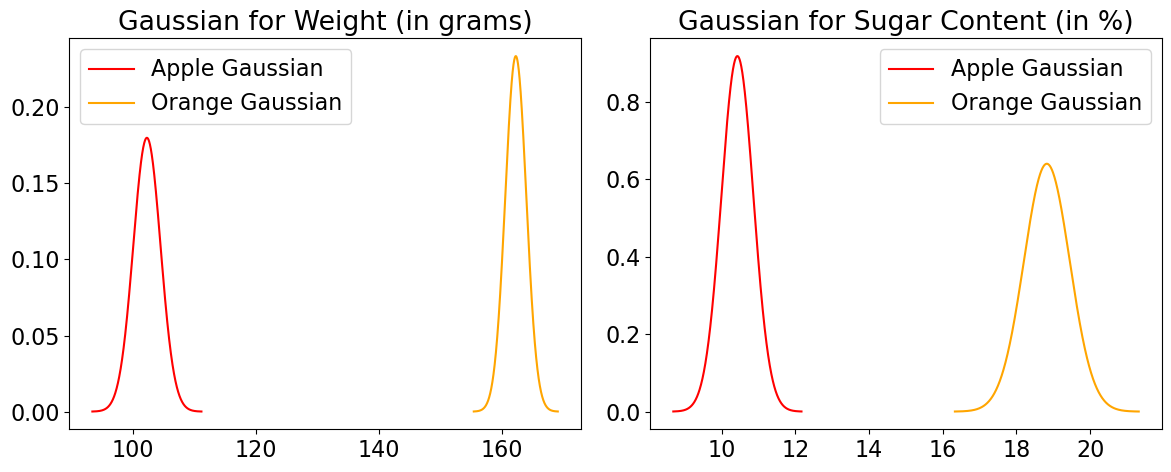

In [38]:
plot_gaussians(df) # custom-defined function in code/plotting_functions.py

In [ ]:
df.describe()

In [ ]:
X_toy = df.drop(columns = ['Fruit'])
y_toy = df['Fruit']

Let's say we have a test fruit with a weight of 106 grams and a sugar content of 11% and we want to predict the class. 
We'll compute the likelihood of these values for both fruits using the Gaussian pdf:

In [ ]:
def gaussian_pdf(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-np.power(x - mean, 2) / (2 * variance))

# Compute conditional probabilities for the given observation
observed_weight = 106
observed_sugar_content = 11

likelihoods = {}
for fruit in ['Apple', 'Orange']:
    likelihoods[fruit] = {}
    for feature, observed_value in [('Weight (in grams)', observed_weight), ('Sugar Content (in %)', observed_sugar_content)]:
        mean = df[df['Fruit'] == fruit][feature].mean()
        variance = df[df['Fruit'] == fruit][feature].var()
        likelihoods[fruit][feature + "=" + str(observed_value)] = gaussian_pdf(observed_value, mean, variance)
        

In [ ]:
pd.DataFrame(likelihoods)

$p(Apple \mid  \text{Weight (in grams) = 106, Sugar Content (in \%) = 11}) = $ 
$ p(Apple) \times p(\text{Weight (in grams} = 106 \mid c = \text{Apple})  \times  p(\text{Sugar Content (in \%)} = 11 \mid c = \text{Apple})$

$p(Orange \mid  \text{Weight (in grams) = 106, Sugar Content (in \%) = 11}) = $ 
$ p(Orange) \times p(\text{Weight (in grams} = 106 \mid c = \text{Orange})  \times  p(\text{Sugar Content (in \%)} = 11 \mid c = \text{Orange})$

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_toy.values, y_toy)

In [ ]:
model.var_, model.theta_

In [ ]:
model.class_prior_

In [ ]:
model.predict([[106.0, 11.0]])

- Gaussian naive Bayes assumes normality
    - If the features are not normally distributed transform the data to make them more normal
    - Scikit-learn provides the `PowerTransformer()` for this process
    - From the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer): "*...Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like.*"

## Summary and final remarks

### General comments on naive Bayes

- Family of probabilistic classifiers 
- GausianNB is used on very high dimensional numeric data
- BernoulliNB and MultinomialNB are used for sparse data (e.g., text data). 
    - MultinomialNB usually performs better than BernoulliNB, especially when you are working with large documents.
    - Complexity hyperparameter: `alpha`

- A fast and robust way to learn the corresponding parameters
- Training procedure is easy to understand 
- Surprising accuracy considering its simplicity
- Scales great; learning a naive Bayes classifier is just a matter of counting how many times each attribute co-occurs with each class
- To avoid underflow, all the calculations are done with log likelihoods.  
- Can be easily used for multi-class classification

- It's closely related to linear classifiers, which we'll see in the next lecture. 
    - When we take the logarithms, the products turn into summations. 
- Can provides a informative set of features from which to predict the class (next class)

- Often provide generalization performance that is slightly worse 
- Assumes that spammers generate e-mails by picking words at random. It means that sentences have no syntax and content. Is that a fair assumption? 
    - oversimplification 
    - sometimes the best theories are the most oversimplified 🤷🏻‍♀️

- Although naive Bayes is known as a decent classifier, it is known to be a **bad estimator**, so the probability outputs from `predict_proba` are not to be taken too seriously.

![](../../img/eva-seeyou.png)
